Question 1: What is Simple Linear Regression?

Simple Linear Regression is a statistical method used to model the relationship between a single independent variable (X) and a dependent variable (Y) by fitting a straight line (Y = a + bX). It helps predict Y based on X.

✅ Question 2: Key Assumptions of Simple Linear Regression

Linearity: Relationship between X and Y is linear.

Independence: Observations are independent.

Homoscedasticity: Constant variance of residuals.

Normality of errors: Residuals are normally distributed.

No multicollinearity: Not applicable in simple regression (only one predictor).

✅ Question 3: What is Heteroscedasticity?

Heteroscedasticity occurs when the variance of residuals changes across levels of X. It violates the assumption of constant variance and can lead to:

Biased standard errors

Invalid hypothesis tests

Poor model reliability

Fixes: Use log transformation, weighted regression, or robust standard errors.

✅ Question 4: What is Multiple Linear Regression?

Multiple Linear Regression models the relationship between two or more independent variables and a dependent variable
It captures more complex relationships and interactions.

✅ Question 5: What is Polynomial Regression?

Polynomial Regression fits a curved line to data by including powers of X:
Y=a+b1X+b2X^2 +⋯+bnX^n

Difference: Linear regression fits a straight line; polynomial regression fits curves using higher-degree terms.

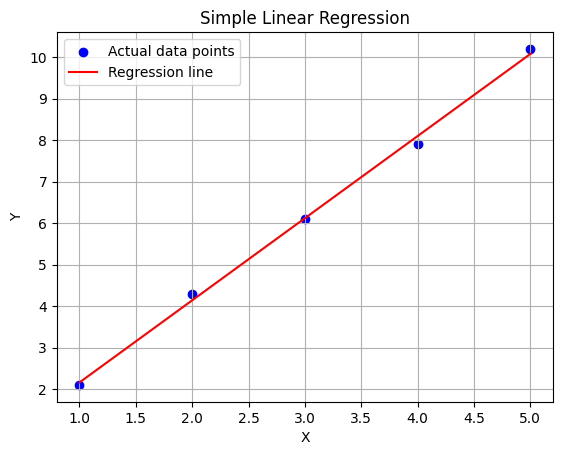

In [5]:
#Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Make predictions
Y_pred = model.predict(X)

# Plot the results
plt.scatter(X, Y, color='blue', label='Actual data points')
plt.plot(X, Y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()



In [15]:
#Question 7: Fit a Multiple Linear Regression model on this sample data:
#● Area = [1200, 1500, 1800, 2000]
#● Rooms = [2, 3, 3, 4]
#● Price = [250000, 300000, 320000, 370000]
#Check for multicollinearity using VIF and report the results.

import numpy as np

# 1. Define a numpy array for 'Area'
Area = np.array([1200, 1500, 1800, 2000])

# 2. Define a numpy array for 'Rooms'
Rooms = np.array([2, 3, 3, 4])

# 3. Combine Area and Rooms into a single 2D numpy array named X
X = np.column_stack((Area, Rooms))

# 4. Define a numpy array for 'Price'
Y = np.array([250000, 300000, 320000, 370000])

print("Independent variables (X):")
print(X)
print("\nDependent variable (Y):")
print(Y)

from sklearn.linear_model import LinearRegression

# Instantiate the Multiple Linear Regression model
model_mlr = LinearRegression()

# Fit the model to the data
model_mlr.fit(X, Y)

# Print the coefficients and the intercept
print(f"Coefficients (Area, Rooms): {model_mlr.coef_}")
print(f"Intercept: {model_mlr.intercept_}")

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a Pandas DataFrame from X with column names
X_df = pd.DataFrame(X, columns=['Area', 'Rooms'])

# Initialize an empty list to store VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(len(X_df.columns))]

# Print the VIF values
print("VIF values for independent variables:")
print(vif_data)

Independent variables (X):
[[1200    2]
 [1500    3]
 [1800    3]
 [2000    4]]

Dependent variable (Y):
[250000 300000 320000 370000]
Coefficients (Area, Rooms): [   63.15789474 34736.84210526]
Intercept: 103157.89473684214
VIF values for independent variables:
  feature         VIF
0    Area  127.796923
1   Rooms  127.796923


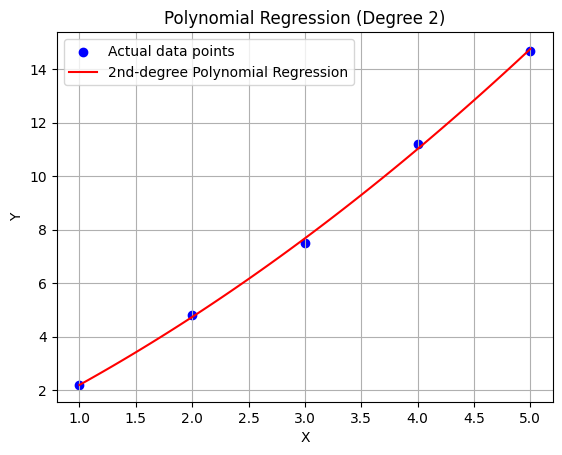

In [12]:
#Question 8: Implement polynomial regression on the following data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
#Fit a 2nd-degree polynomial and plot the resulting curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Create a linear regression model
model_poly = LinearRegression()

# Fit the model to the polynomial features
model_poly.fit(X_poly, Y)

# Make predictions for plotting the curve
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
Y_plot_pred = model_poly.predict(X_plot_poly)

# Plot the results
plt.scatter(X, Y, color='blue', label='Actual data points')
plt.plot(X_plot, Y_plot_pred, color='red', label='2nd-degree Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()

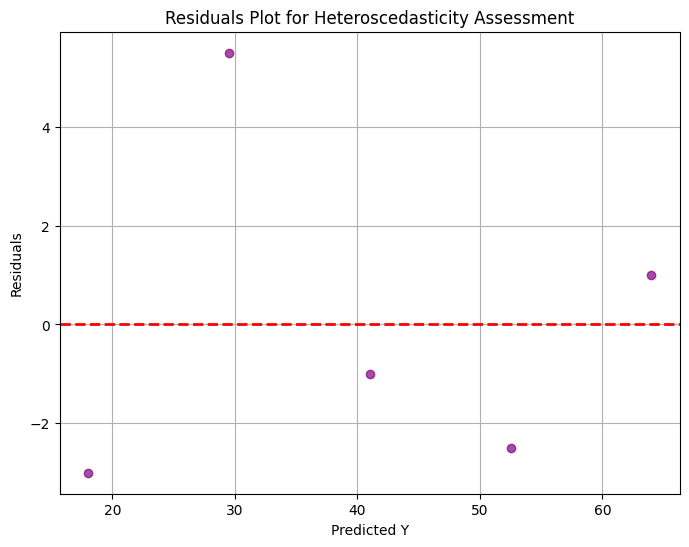

Interpretation of the Residuals Plot:
If the spread of residuals changes as the predicted Y values (or X values) change, it indicates heteroscedasticity. Ideally, residuals should be randomly scattered around zero with a constant variance across all predicted values (or X values).


In [14]:
#Question 9: Create a residuals plot for a regression model trained on this data:
#● X = [10, 20, 30, 40, 50]
#● Y = [15, 35, 40, 50, 65]
#Assess heteroscedasticity by examining the spread of residuals.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Create a residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, color='purple', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Heteroscedasticity Assessment')
plt.grid(True)
plt.show()

print("Interpretation of the Residuals Plot:")
print("If the spread of residuals changes as the predicted Y values (or X values) change, it indicates heteroscedasticity. Ideally, residuals should be randomly scattered around zero with a constant variance across all predicted values (or X values).")

Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

Ans:- As a data scientist:

For heteroscedasticity:

Apply log or square root transformation to target variable.

Use weighted least squares or robust regression.

For multicollinearity:

Check VIF and remove highly correlated features.

Use PCA or regularization (Ridge/Lasso).

Model validation:

Use cross-validation and residual plots.

Ensure assumptions are met before deployment.